# 双対上昇法及び乗数法による最適化
最適化問題
$$  \min_{x, y \in \mathbb{R}} 3x^2 + 2y^2 subject\ to\ x + y = 1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

In [2]:
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)

# 使用する関数群
f = lambda x: 3 * x[0] ** 2 + 2 * x[1] ** 2
df_dx = lambda x: np.array([6 * x[0], 4 * x[1]])
g = lambda x: x[0] + x[1] - 1
L = lambda x, lmd: f(x) + lmd * g(x)
dL_dx = lambda x, lmd: np.array([6 * x[0] + lmd, 4 * x[1] + lmd]) 

## 双対上昇法
以下を収束するまで繰り返す
$$ \boldsymbol{x}_{k+1}=argmin_{\boldsymbol{x} \in \chi}L(\boldsymbol{x},\boldsymbol{\lambda_k})$$
$$
\boldsymbol{\lambda}_{k + 1}
= \boldsymbol{\lambda}_k + \varepsilon_k \boldsymbol{g}(\boldsymbol{\boldsymbol{x}_{k+1}})
$$

In [3]:
def dual_ascent(dL_dx=dL_dx, g=g, eps=1., iter_num=30, x_init=np.array([0., 0.]), lambd_init=0):
    n = 0
    m = 0
    x_ = x_init
    lambd_ = lambd_init
    x_searched = []
    x_searched.append(x_)
    lambd_searched = []
    lambd_searched.append(lambd_)
    while n < iter_num:
        # optimize x
        x_next = np.array([- lambd_ / 6, - lambd_ / 4])
        x_ = x_next
        x_searched.append(x_next)
        # optimize lambd
        lambd_next = lambd_ + eps * g(x_)
        lambd_ = lambd_next
        lambd_searched.append(lambd_)
        n = n + 1
        m = 0
    return x_searched, lambd_searched

x_searched, lambd_searched = dual_ascent()
print("xの最適解: ", x_searched[-1])
print("lambdaの最適解: ", lambd_searched[-1])

xの最適解:  [0.39999993 0.5999999 ]
lambdaの最適解:  -2.3999997721153568


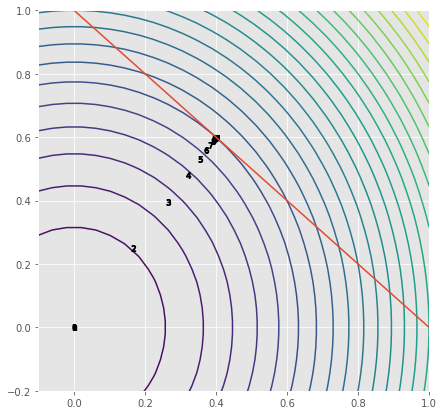

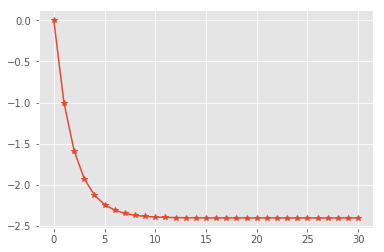

In [4]:
def draw_optimization_path(x, f, g, x1=np.linspace(-1, 1), x2 = np.linspace(-1, 1)):
    xx, yy = np.meshgrid(x1, x2)
    z = f(np.array([xx, yy]))
    plt.figure(figsize=(7, 7))
    for i in range(len(x_searched)):
        plt.plot(x[i][0], x[i][1], marker="$" + str(i) + "$", color="black")
    plt.contour(xx, yy, z,levels=25)
    plt.plot(x1, - x1 + 1)
    plt.xlim(-0.1, 1)
    plt.ylim(-0.2, 1.0)
    plt.show()

def draw_lambda(lambda_searched):
    plt.plot(np.arange(0, len(lambda_searched)), lambd_searched, marker="*")
    plt.show()

draw_optimization_path(x_searched, f, g)
draw_lambda(lambd_searched)

## 乗数法
以下を収束するまで繰り返す
$$ \boldsymbol{x}_{k+1}=argmin_{\boldsymbol{x} \in \chi}L_c(\boldsymbol{x},\boldsymbol{\lambda_k})$$
$$
\boldsymbol{\lambda}_{k + 1}
= \boldsymbol{\lambda}_k + c \boldsymbol{g}(\boldsymbol{\boldsymbol{x}_{k+1}})
$$

In [5]:
def method_of_multipliers(lambd=0., c=5., iter_num=10, x_init=np.array([0., 0.]), lambd_init=0):
    n = 0
    x_ = x_init
    lambd_ = lambd_init
    x_searched = []
    x_searched.append(x_)
    lambd_searched = []
    lambd_searched.append(lambd_)
    while n < iter_num:
        x_next = np.array([(c - lambd_) / (6 + 5 * c / 2), (c - lambd_) / (4 + 5 * c / 3)])
        lambd_next = lambd_ + c * (x_next[0] + x_next[1] - 1)
        x_ = x_next
        lambd_ = lambd_next
        x_searched.append(x_)
        lambd_searched.append(lambd_)
        n = n + 1
    return x_searched, lambd_searched

x_searched, lambd_searched = method_of_multipliers()
print("xの最適解: ", x_searched[-1])
print("lambdaの最適解: ", lambd_searched[-1])

xの最適解:  [0.39999485 0.59999227]
lambdaの最適解:  -2.3999690965858917


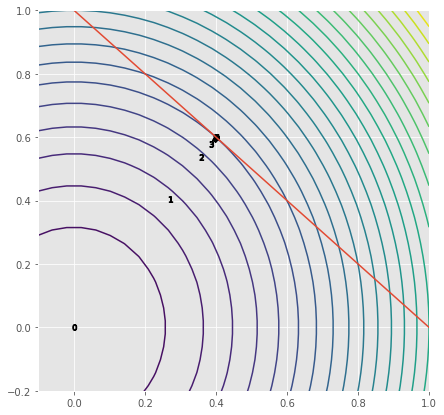

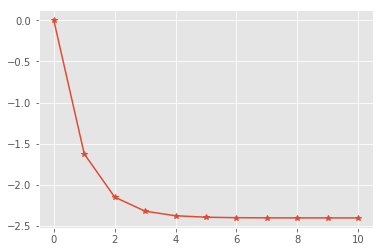

In [6]:
draw_optimization_path(x_searched, f, g)
draw_lambda(lambd_searched)